1. [Открытие данных](#start)
2. [Предобработка данных](#preprocessing)
3. [Описание данных А/В теста](#info)
4. [Применение фреймворка ICE для приоритизации гипотез](#ice)  
5. [Применение фреймворка RICE для приоритизации гипотез](#rice)
6. [Проведение А/В теста](#run_test)
7. [Построение графика кумулятивной выручки по группам](#cumulative)
8. [Построение графика кумулятивного среднего чека по группам](#cumulative_check)
9. [Построение графика относительного изменения кумулятивного среднего чека группы B к группе A](#cumulative_check_avg)
10. [Построение графика кумулятивного среднего количества заказов на посетителя по группам](#cumulative_rec_avg)
11. [Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A](#cumulative_rec)
12. [Построение точечного графика количества заказов по пользователям](#scatter)
13. [Подсчет 95-й и 99-й перцентилей](#per)
14. [Подсчет статистической значимости различий](#stat)
15. [Принятие решения по результатам теста](#answer)
16. [Общий вывод](#done)

## Открытие данных <a id="start"></a> 

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
# загрузка данных
try:
    hypothesis_9 = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    hypothesis_9 = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [3]:
# настройка для вывода содержимого ячеек
pd.options.display.max_colwidth = 130

## Предобработка данных <a id="preprocessing"></a> 

In [4]:
# функция для предобработки данных
def data_preprocessing(data):
    # приведение наименования столбцов датафрейма к правильному виду
    data.columns = [x.lower().replace(' ', '_') for x in data.columns]
    print('Вывод датафрейма на экран')  
    display(data)
    print(' ')   
    print(' ')
    print('Вывод основной информации о датафрейме с помощью метода info()') 
    display(data.info())
    print(' ') 
    print(' ')
    print('Вывод количества пропущенных значений для каждого столбца датафрейма')
    display(data.isna().sum())
    print(' ')   
    print(' ')
    print('Подсчёт количества явных дубликатов')
    display(data.duplicated().sum())

In [5]:
data_preprocessing(hypothesis_9)

Вывод датафрейма на экран


,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


 
 
Вывод основной информации о датафрейме с помощью метода info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


None

 
 
Вывод количества пропущенных значений для каждого столбца датафрейма


hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

 
 
Подсчёт количества явных дубликатов


0

In [6]:
data_preprocessing(orders)

Вывод датафрейма на экран


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


 
 
Вывод основной информации о датафрейме с помощью метода info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

 
 
Вывод количества пропущенных значений для каждого столбца датафрейма


transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64

 
 
Подсчёт количества явных дубликатов


0

In [7]:
data_preprocessing(visitors)

Вывод датафрейма на экран


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


 
 
Вывод основной информации о датафрейме с помощью метода info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

 
 
Вывод количества пропущенных значений для каждого столбца датафрейма


date        0
group       0
visitors    0
dtype: int64

 
 
Подсчёт количества явных дубликатов


0

**Вывод**   
Дубликатов, пропусков в данных нет. Необходимо изменение типов данных для колонок date датафремов visitors и orders.
Также необхоимо переименовать столбцы датафрейма orders: transactionid и visitorid.

In [8]:
# изменение типа данных в столбцах датафреймов visitors и orders
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [9]:
# приведение наименования столбца датафрейма orders к правильному виду
orders = orders.rename(columns={'transactionid' : 'transaction_id', 'visitorid' : 'visitor_id'})

**Вывод**   
Предобработка данных для исследования проведена.

## Описание данных А/В теста <a id="info"></a> 

In [10]:
# группы в А/В-тесте
# orders
print('Виды групп:', orders['group'].unique())

Виды групп: ['B' 'A']


In [11]:
# группы в А/В-тесте
# visitors
print('Виды групп:', visitors['group'].unique())

Виды групп: ['A' 'B']


In [12]:
# временной интервал в А/В-тесте
# дата начала теста
print('Дата начала теста:', orders['date'].min())

# дата окончания теста
print('Дата окончания теста:', orders['date'].max())

Дата начала теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00


In [13]:
# количество пользователей в каждой группе
group_a = orders.query('group == "A"')['visitor_id'].count()
print('Количество пользователей в группе А:', group_a)

group_b = orders.query('group == "B"')['visitor_id'].count()
print('Количество пользователей в группе B:', group_b)

Количество пользователей в группе А: 557
Количество пользователей в группе B: 640


In [14]:
# пользователи, попавшие в обе группы
# формируем группы
group_a = orders.query('group == "A"')
group_b = orders.query('group == "B"')

In [15]:
# отображаем id пользователей, попавших в обе группы
group_ab = np.intersect1d(group_a['visitor_id'], group_b['visitor_id'])
print('id пользователей, попавших в обе группы:', group_ab)

id пользователей, попавших в обе группы: [   8300375  199603092  232979603  237748145  276558944  351125977
  393266494  457167155  471551937  477780734  818047933  963407295
 1230306981 1294878855 1316129916 1333886533 1404934699 1602967004
 1614305549 1648269707 1668030113 1738359350 1801183820 1959144690
 2038680547 2044997962 2378935119 2458001652 2579882178 2587333274
 2600415354 2654030115 2686716486 2712142231 2716752286 2780786433
 2927087541 2949041841 2954449915 3062433592 3202540741 3234906277
 3656415546 3717692402 3766097110 3803269165 3891541246 3941795274
 3951559397 3957174400 3963646447 3972127743 3984495233 4069496402
 4120364173 4186807279 4256040402 4266935830]


In [16]:
# преобразуем с помощью list(), чтобы исключить id
group_ab = list(group_ab)

In [17]:
# убираем пользователей, которые попали в обе группы, чтобы не искажать результаты
orders = orders.query('visitor_id != @group_ab')

In [18]:
# проверка наличия пользователей, попавших в обе группы
# количество пользователей в каждой группе после удаления
group_a=orders.query('group == "A"')['visitor_id'].count()
print('Количество пользователей в группе А:', group_a)

group_b=orders.query('group == "B"')['visitor_id'].count()
print('Количество пользователей в группе А:', group_b)

# пользователи, попавшие в обе группы
# формируем группы
group_a=orders.query('group == "A"')
group_b=orders.query('group == "B"')

# отображаем id пользователей, попавших в обе группы
group_ab = np.intersect1d(group_a['visitor_id'], group_b['visitor_id'])
print('id пользователей, попавших в обе группы:', group_ab)

Количество пользователей в группе А: 468
Количество пользователей в группе А: 548
id пользователей, попавших в обе группы: []


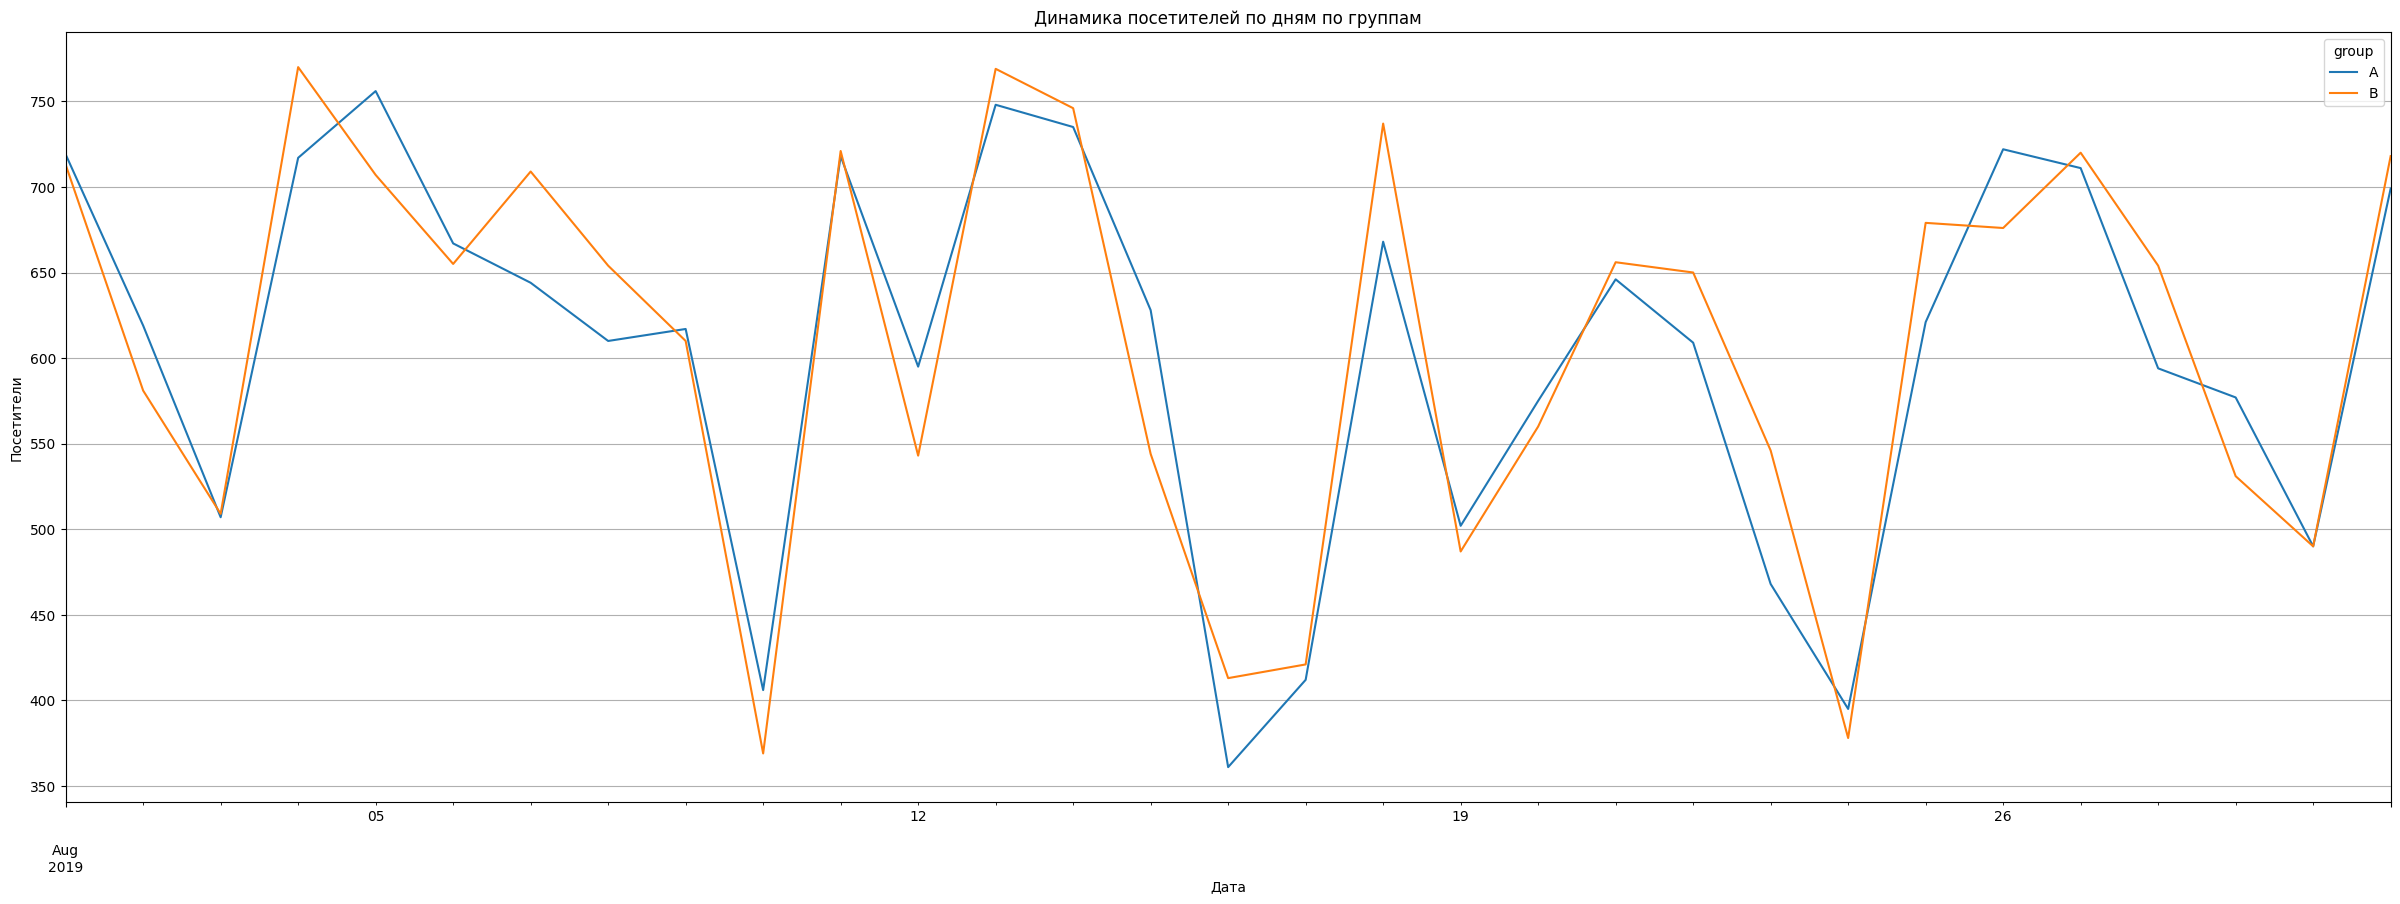

In [19]:
# динамика посетителей по дням по группам в датафрейме visitors (на общем графике)
visitors.pivot_table(index='date', columns='group', values='visitors', aggfunc='sum').plot(figsize=(30, 10), grid=True)
plt.title('Динамика посетителей по дням по группам')
plt.xlabel('Дата')
plt.ylabel('Посетители')
plt.show()

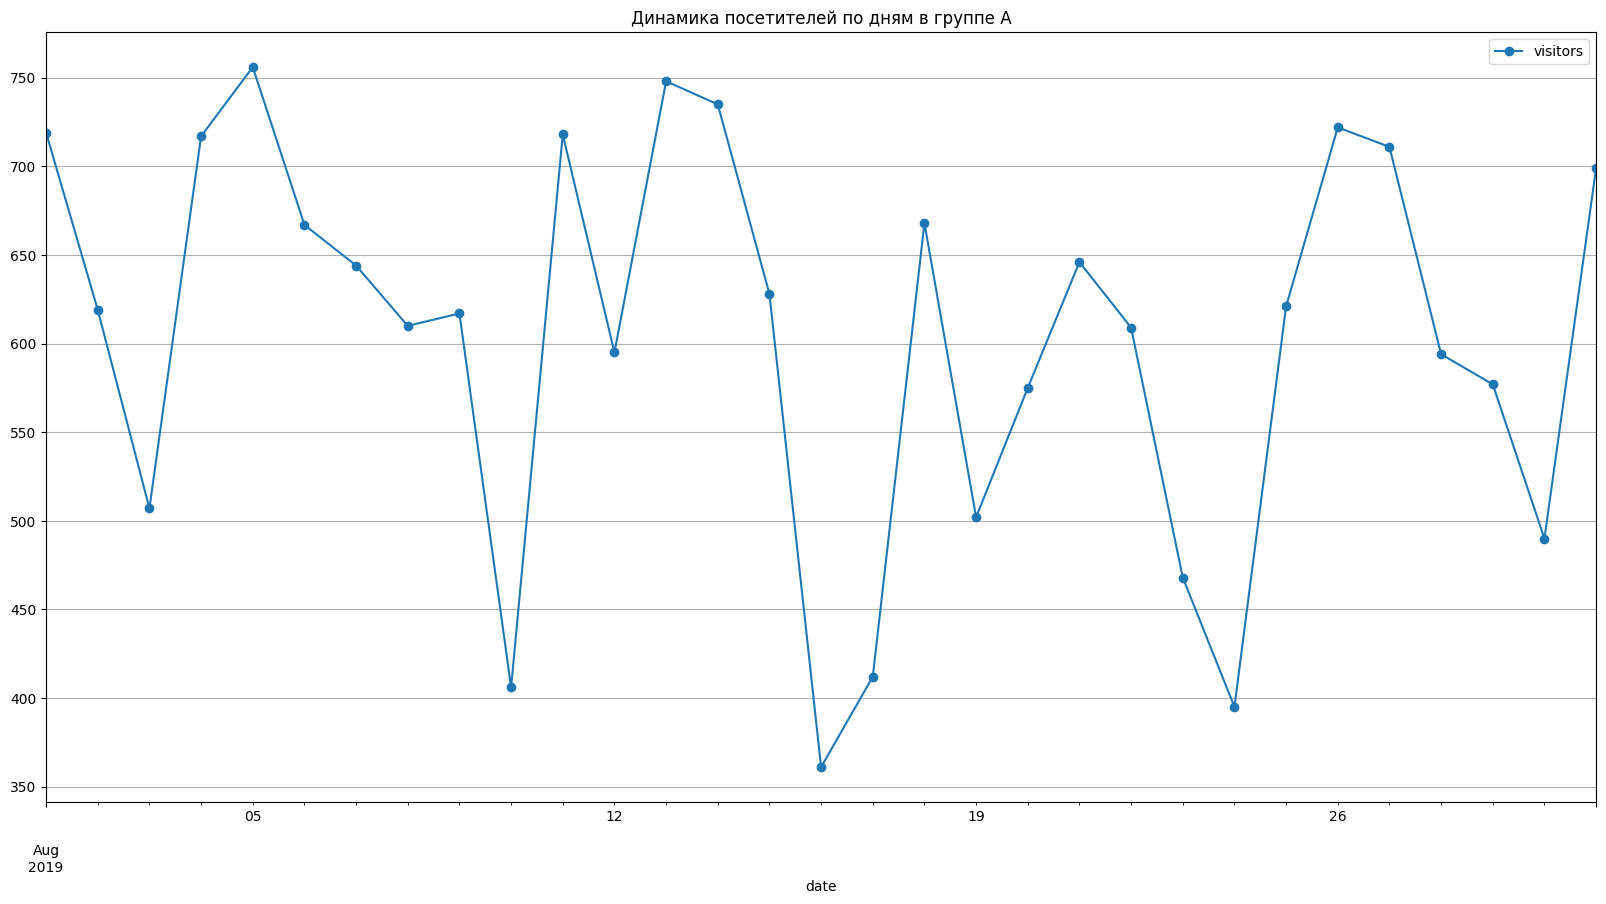

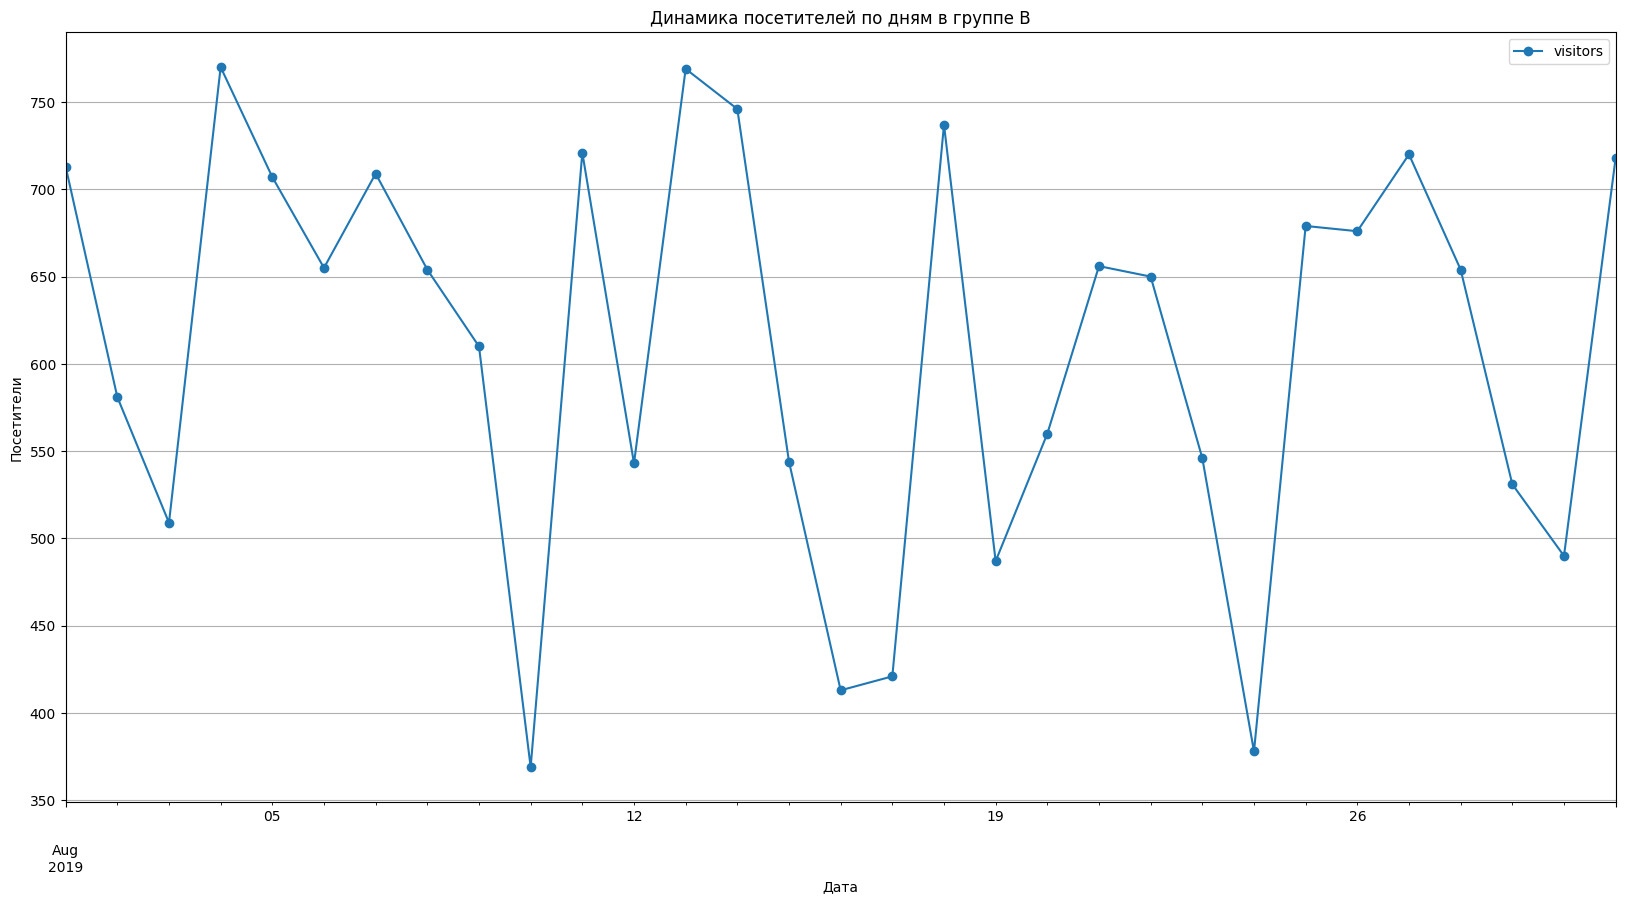

In [20]:
# динамика посетителей по дням по группам в датафрейме visitors
# динамика посетителей по дням по группе А
visitors[visitors['group']=='A'].pivot_table(index='date', values='visitors')\
    .plot(grid=True, figsize=(20, 10), style='o-', title = 'Динамика посетителей по дням в группе А')

# динамика посетителей по дням по группе B
visitors[visitors['group']=='B'].pivot_table(index='date', values='visitors')\
    .plot(grid=True, figsize=(20, 10), style='o-', title = 'Динамика посетителей по дням в группе B') 
plt.xlabel('Дата')
plt.ylabel('Посетители')
plt.legend()
plt.show()

**Вывод**   
В тесте участвуют группы А, В. Дата начала теста 1 августа 2019 г., а конец теста — 31 августа 2019 г. Исключили пользователей, которые попали в обе группы, чтобы исключить искажение результатов теста. На основании графиков динамики посетителей по дням по группам можно сделать вывод, что динамика в группах схожа, но, довольно, не устойчива, поскольку на графике есть как провалы, так и пиковые значения.

## Применение фреймворка ICE для приоритизации гипотез <a id="ice"></a> 

In [21]:
hypothesis_9['ICE'] = (hypothesis_9['impact'] * hypothesis_9['confidence'] / hypothesis_9['efforts']).round(2)
display(hypothesis_9[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Вывод**   
Наиболее перспективные гипотезы при способе приоритизации ICE:  
* «Запустить акцию, дающую скидку на товар в день рождения»;  
* «Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей»;  
* «Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок».  

Наименее перспективными являются гипотезы:  
* «Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов»;  
* «Изменить структуру категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар»;  
* «Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей».

#### Применение фреймворка RICE для приоритизации гипотез <a id="rice"></a> 

In [22]:
hypothesis_9['RICE'] = hypothesis_9['reach'] * hypothesis_9['impact'] * hypothesis_9['confidence'] / hypothesis_9['efforts']
display(hypothesis_9[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод**   
Наиболее перспективные гипотезы при способе приоритизации RICE:  
* «Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок»;  
* «Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа»;  
* «Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей»;  
* «Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию».  
  
  
Наименее перспективными являются гипотезы:  
* «Запустить собственную службу доставки, что сократит срок доставки заказов»;  
* «Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов»;  
* «Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей».

In [23]:
# анализ изменения приоритизации гипотез при применении RICE вместо ICE
hypothesis_9.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


In [24]:
# анализ изменения приоритизации гипотез при применении RICE вместо ICE
hypothesis_9.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


**Вывод**   
Приоритизация гипотез поменялась при применении RICE из-за параметра reach (скольких пользователей затронет изменение). Гипотеза «Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок» встала на первое место, поскольку у неё наивысший показатель параметра reach.

## Проведение А/В теста <a id="run_test"></a>

In [25]:
# создание датафрейма datesGroups с уникальными парами значений 'date' и 'group', таблицы orders. 
# избавление от дубликатов методом drop_duplicates().
datesGroups  = orders[['date', 'group']].drop_duplicates()

In [26]:
# объявление переменной ordersAggregated, содержащей: 
    # дату; 
    # группу A/B-теста; 
    # число уникальных заказов в группе теста по указанную дату включительно;
    # число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
    # суммарную выручку заказов в группе теста по указанную дату включительно.
# ordersAggregated отсортирована по столбцам 'date', 'group'.

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [27]:
# объявление переменной visitorsAggregated, содержащей: 
    # дату; 
    # группу A/B-теста; 
    # количество уникальных посетителей в группе теста по указанную дату включительно.
# visitorsAggregated отсортирована по столбцам 'date', 'group'.

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [28]:
# определение переменной cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date', 'group' методом merge(). 
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

In [29]:
# присвоение столбцам cumulativeData названия ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [30]:
# вывод первых 5 строк переменной cumulativeData
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [31]:
# проверка правильности создания cumulativeData
# максимальная дата
print(ordersAggregated['date'].max())
print(visitorsAggregated['date'].max())
print(cumulativeData['date'].max())

2019-08-31 00:00:00
2019-08-31 00:00:00
2019-08-31 00:00:00


In [32]:
# проверка правильности создания cumulativeData
# минимальная дата
print(ordersAggregated['date'].min())
print(visitorsAggregated['date'].min())
print(cumulativeData['date'].min())

2019-08-01 00:00:00
2019-08-01 00:00:00
2019-08-01 00:00:00


In [33]:
# объявление переменных cumulativeRevenueA и cumulativeRevenueB
# в которых сохранены данные о датах, выручке и числе заказов в группах A и B.

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

## Построение графика кумулятивной выручки по группам <a id="cumulative"></a>

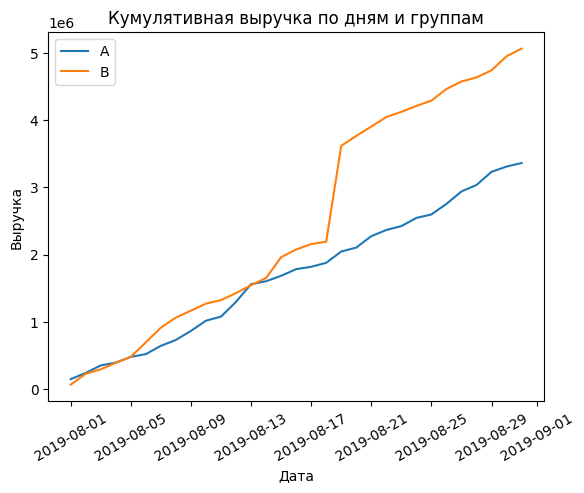

In [34]:
# построение графика выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# построение графика выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка по дням и группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(rotation=30)
plt.legend()
plt.show()

**Вывод**   
В обеих группах стабильный рост выручки. В начале теста метрика колебалась, но затем после 17.08.2019 у группы В заметен большой скачок. Данный факт может быть связан с тем, что в эти дни был либо очень дорогой заказ, либо огромное количество заказов. После 21.08.2019 выручка в обеих группах растет схожими темпами. Необходимо рассмотреть поближе данный интервал 17.08.2019-21.08.2019.

In [35]:
# изучение заказов 18.08.2019-21.08.2019 группы В
cumulativeRevenueB.query('"2019-08-17" <= date <= "2019-08-21"')

,date,revenue,orders
33,2019-08-17,2155542,320
35,2019-08-18,2190865,327
37,2019-08-19,3620785,348
39,2019-08-20,3768059,368
41,2019-08-21,3908406,380


**Вывод**   
Виден резкий скачок количества заказов 19.08.2019 и 20.08.2019. Необходимо рассмотреть заказы в эти дни.

In [36]:
# изучение заказов 19.08.2019
orders.query('date == "2019-08-19"').sort_values(by='revenue', ascending=False).head()

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B


In [37]:
# изучение заказов 20.08.2019
orders.query('date == "2019-08-20"').sort_values(by='revenue', ascending=False).head()

,transaction_id,visitor_id,date,revenue,group
751,348143148,689129267,2019-08-20,37150,B
630,1329556473,2626290177,2019-08-20,25890,B
749,2419950278,509080881,2019-08-20,19260,B
631,3448552908,960782649,2019-08-20,18990,A
681,3185013805,4037118491,2019-08-20,17990,B


**Вывод**   
Можно сделать вывод, что 19.08.2019 есть аномальный по стоимости заказ №425 и данный заказ оказывает влияние на результаты графика «Кумулятивная выручка по дням и группам», где виден резкий скачок.

## Построение графика кумулятивного среднего чека по группам <a id="cumulative_check"></a>

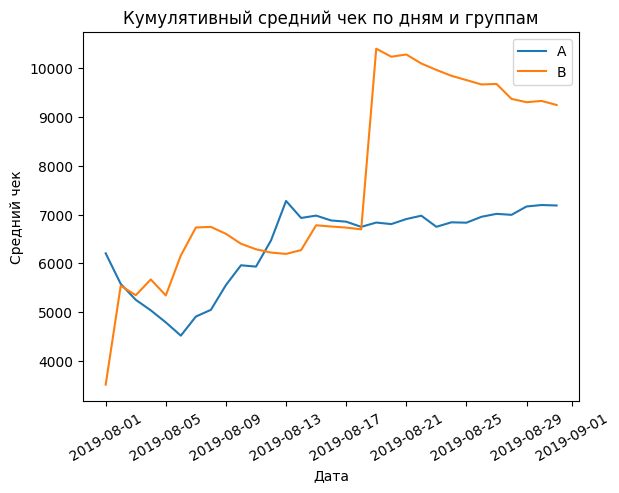

In [38]:
# построение графика выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# построение графика выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('Кумулятивный средний чек по дням и группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.xticks(rotation=30)
plt.legend()
plt.show()

**Вывод**   
Почти в начале теста сегмент B вырвался вперёд и продолжал лидировать весь остаток теста, за исключением периода ближе к середине теста. Затем сегмент В подскочил. Данный факт связан с появлением крупного по стоимости заказа №425.

## Построение графика относительного изменения кумулятивного среднего чека группы B к группе A <a id="cumulative_check_avg"></a>

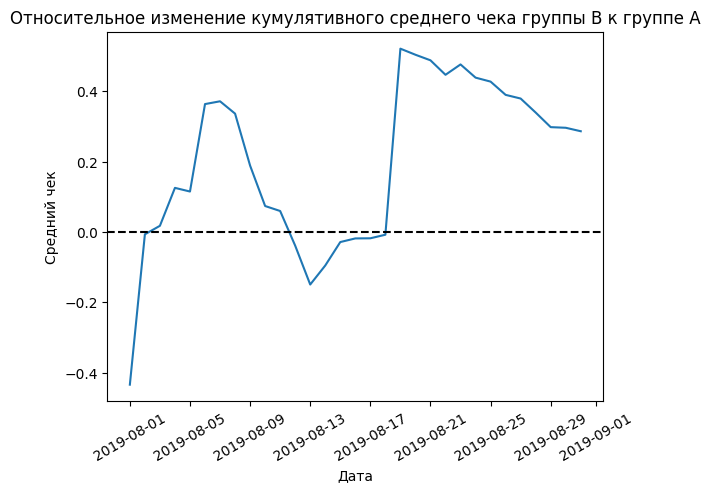

In [39]:
# сбор данных в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

# построение графика относительного изменения кумулятивного среднего чека группы B к группе A
plt.plot(
    mergedCumulativeRevenue['date'], 
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1
)

# добавление оси X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.xticks(rotation=30)
plt.show()

**Вывод**   
Результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы. 19.08.2019 можно с увверенностью сказать, что такой всплеск связан с аномально высокой стоимостью заказа № 425.

## Построение графика кумулятивного среднего количества заказов на посетителя по группам <a id="cumulative_rec_avg"></a>

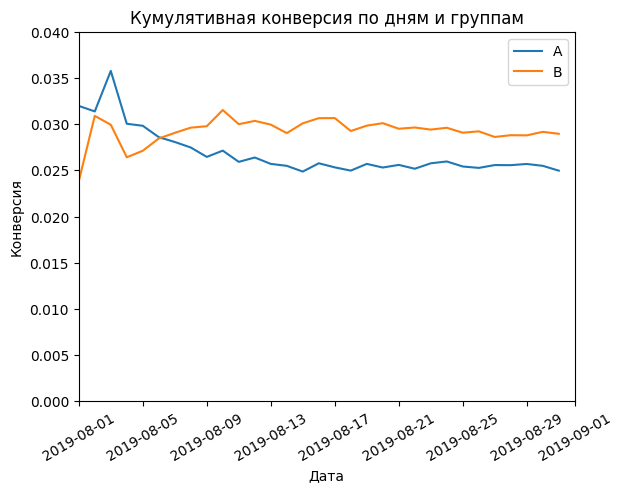

In [40]:
# подсчет кумулятивной конверсии
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделение данных по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделение данных по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# построение графика кумулятивного среднего количества заказов на посетителя по группам
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивная конверсия по дням и группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
plt.xticks(rotation=30)
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.04]) # масштаб осей
plt.show()

**Вывод**   
В начале теста группа А имела большую конверсию. Группы колебались, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

#### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A <a id="cumulative_rec"></a>

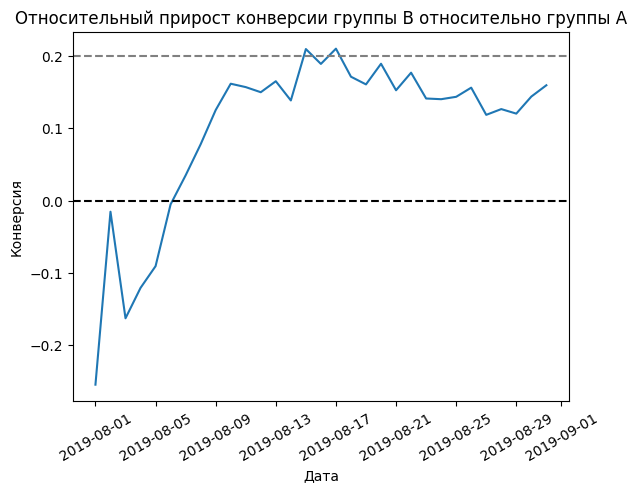

In [41]:
# объявление переменной mergedCumulativeConversions, объединив таблицы cumulativeDataA и cumulativeDataB методом merge()
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

# построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
plt.plot(
    mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1
)
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.xticks(rotation=30)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.show()

**Вывод**   
Почти с самого начала теста группа B лидирует по конверсии: становится лучше и лучше, однако она не зафиксировалась около прироста в 20% относительно группы A, а стала снижаться, но затем снова пошла в рост.

## Построение точечного графика количества заказов по пользователям <a id="scatter"></a>

In [42]:
# создание датафрейма ordersByUsers
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

,visitor_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


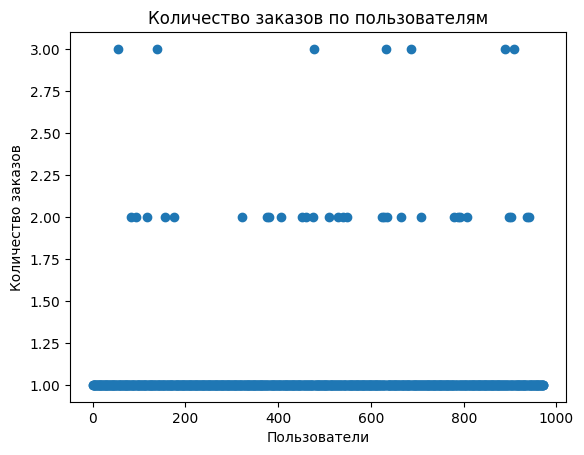

In [43]:
# построение точечного графика количества заказов по пользователям
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show()

**Вывод**   
Пользователей, заказавших более 2 раз, мало. Они вполне могут быть аномальными. Много пользователей с 2 заказами.

## Подсчет 95-й и 99-й перцентилей <a id="per"></a>

In [44]:
display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# подсчет 95-й и 99-й перцентили количества заказов на пользователя
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

,visitor_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


[1. 2.]


**Вывод**   
Не более 5% пользователей оформили заказ более 1 раза. И 1% пользователей заказывали более 2 раз.  
Выберем 3 заказа на одного пользователя за верхнюю границу числа заказов, и отсеим аномальных пользователей по ней.

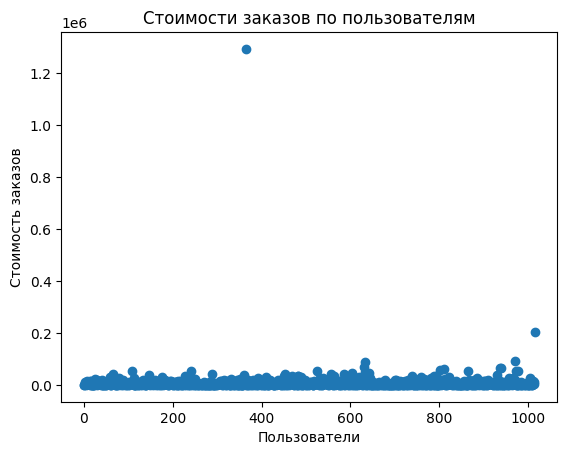

In [45]:
# построение точечного графика стоимостей заказов
# серия из чисел от 0 до количества наблюдений в orders['revenue']
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимости заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.show()

**Вывод**   
На графике видно 2 аномалии - выброса: в районе 200 000 руб. и более 1 200 000 руб. Заказов стоимостью более 200 000 руб. очень мало.

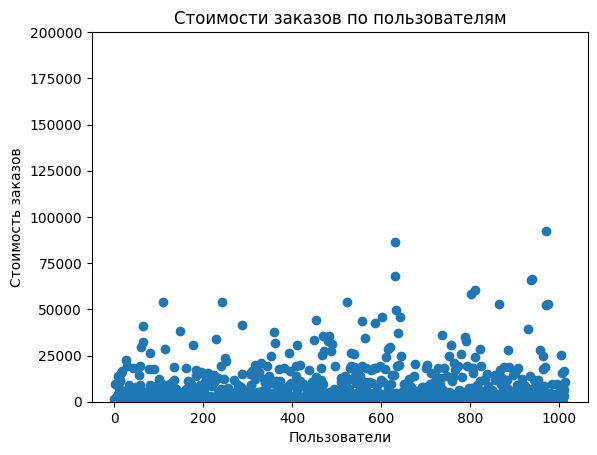

In [46]:
# построение точечного графика стоимостей заказов без аномалий
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.ylim((0, 200000))
plt.title('Стоимости заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.show()

**Вывод**   
На графике без аномалий видно, что заказов между 200 000 руб. и 100 000 руб. нет совсем. Однако, большая доля заказов по стоимости приходится на суммы менее 100 000 руб.

In [47]:
display(orders.sort_values(by='revenue', ascending=False).head(10))

# подсчет 95-й и 99-й перцентили стоимости заказов
print(np.percentile(orders['revenue'], [95, 99])) 

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


[26785. 53904.]


**Вывод**   
Не более, чем у 5% заказов чек дороже 26 785 руб. И не больше, чем у 1% заказов — дороже 53 904 руб.  
Выберем 30 000 руб. за верхнюю границу стоимости заказов, и отсеим аномальные заказы по ней.

## Подсчет статистической значимости различий <a id="stat"></a>

Сформулируем гипотезы.  
Нулевая: различий в среднем количестве заказов между группами нет.  
Альтернативная: различия в среднем количестве заказов между группами есть.

In [48]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [49]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [50]:
# объявление переменных ordersByUsersA и ordersByUsersB со столбцами ['visitor_id', 'orders']
# где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

In [51]:
# объявление переменных sampleA и sampleB, в которых 
# пользователям с заказами будет соответствовать число заказов пользователя
# пользователям без заказов — нули
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [52]:
# подсчет статистической значимости различия среднего количества заказов по результатам двух недель теста 
# тест Манна-Уитни
print('P-value:', "{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительное различие в среднем между группами:', "{0:.3f}"
      .format((data['ordersPerDateB'].sum()/data['visitorsPerDateB']
      .sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

P-value: 0.011
Относительное различие в среднем между группами: 0.160


**Вывод**   
P-value значительно меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых» данных сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 16%.

Сформулируем гипотезы.  
Нулевая: различий в среднем чеке между группами нет.  
Альтернативная: различия в среднем чеке между группами есть.  

In [53]:
# подсчет статистической значимости различия среднего количества заказов по результатам двух недель теста 
# тест Манна-Уитни
print('P-value:', "{0:.3f}"
      .format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])
     )

print('Относительное различие в среднем между группами:', "{0:.3f}"
      .format(orders[orders['group']=='B']['revenue']
      .mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.829
Относительное различие в среднем между группами: 0.287


**Вывод**   
P-value больше 0.05. Значит, причин отвергать нулевую гипотезу нет. Кроме того, относительное различие среднего чека между группами 28.7%. Поскольку относительное различие среднего чека между сегментами составляет ~29%, наблюдаемые различия не являются значимыми при таком уровне значимости, а следовательно были получены случайно.

Сформулируем гипотезы.  
Нулевая: различий в среднем количестве заказов на посетителя между группами нет.  
Альтернативная: различия в среднем количестве заказов на посетителя между группами есть.  

In [54]:
# подготовка очищенных от аномалий данных
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print('Количество аномальных пользователей:', abnormalUsers.shape[0])

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64
Количество аномальных пользователей: 9


In [55]:
# подготовка очищенных от аномалий данных
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

**Вывод**   
Поскольку 95-й и 99-й перцентили средних чеков равны 26 785 руб. и 53 904 руб. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 1 и 2 заказа на пользователя. За аномальных пользователей приняты те, кто совершил от 3 заказов или совершил заказ дороже 30 000 руб. Так были исключены 1% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.  
Всего 42 аномальных пользователя.

In [56]:
# подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
print('P-value:', '{0:.3}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие в среднем между группами:', '{0:.3f}'
      .format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.00969
Относительное различие в среднем между группами: 0.164


**Вывод**   
Как и в случае с «сырыми» данными, статистическая значимость достигнута. P-value значительно меньше 0.05, потому нулевую гипотезу отвергаем. Группа В лучше группы А. Таким образом, результаты по среднему количеству заказов практически не изменились. P-value практически не изменился.

Сформулируем гипотезы.  
Нулевая: различий в среднем чеке между группами нет.  
Альтернативная: различия в среднем чеке между группами есть.  

In [57]:
# подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным
print('P-value:', '{0:.3f}'
      .format(st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A', np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительное различие в среднем между группами:', "{0:.3f}"
      .format(orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A', np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.901
Относительное различие в среднем между группами: -0.032


**Вывод**   
P-value увеличился. P-value больше 0.05. Значит, причин отвергать нулевую гипотезу нет. Кроме того, относительное различие среднего чека между группами снизилось с 28.7% до -3.1%.  
Данные хорошо показывают, как сильно аномалии могут влиять на результаты A/B-теста.

## Принятие решения по результатам теста <a id="answer"></a>

**Вывод**  
Имеющиеся факты:
* Есть статистически значимые различия по среднему количеству заказов между группами по «сырым», по данным после фильтрации аномалий;  
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A и есть тенденции к улучшению;  
* График различия среднего чека говорит о том, что результаты колеблются день ото дня.

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным, зафиксировать победу группы В.  

## Общий вывод <a id="done"></a>

Таким образом, были достигнуты поставленные цели исследования:
1. Подготовлены данные для исследования.  
2. Применен фреймворк ICE, RICE для приоритизации гипотез.  
3. Указано, как изменилась приоритизация гипотез при применении RICE вместо ICE. 
4. Проанализирован A/B-тест:  
   * Построены графики кумулятивной выручки по группам, среднего чека по группам.  
   * Построены графики относительного изменения кумулятивного среднего чека группы B к группе A и среднего количества заказов на посетителя группы B к группе A.   
   * Построен график кумулятивного среднего количества заказов на посетителя по группам.  
   * Построены точечные графики количества заказов по пользователям, стоимостей заказов.  
   * Посчитаны 95-й и 99-й перцентили количества заказов на пользователя и стоимости заказов, выбрать границу для определения аномальных пользователей.  
   * Посчитана статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 
   * Посчитана статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.   
   * Посчитана статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.  
   * Посчитана статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.  
5. Принято решение по результатам теста о победе группы В.
6. Сформулирвоаны выводы на протяжении исследования.